# Análise exploratória dos dados 


Foi realizada uma análise dos dados para conhecer melhor cada uma das bases fornecidas e também comerçar a ter ideias para a formulação da nova régua.

In [ ]:
# instalações de pacotes 

!pip install plotly-express

In [80]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime


In [76]:
clientes = pd.read_csv('portfolio_clientes.csv')
clientes.head()

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
0,094aaed740bbd7fcddb6c678c18d883a,PJ,Caucaia,CE,Alimentação Rápida,Alimentação
1,eaade7915611fcdcbba747e3a83365c6,PF,Cidade Ocidental,GO,Lojas Diversas,Varejo
2,1f21958fd296f1b04a1f0c2658913856,MEI,Manaus,AM,Alimentação Rápida,Alimentação
3,fcdfe15db4520db1a1fe8b6a72878655,MEI,São Bernardo do Campo,SP,Alimentação Rápida,Alimentação
4,ba57e8837452b5e0114d7e273de039b4,PJ,Foz do Iguaçu,PR,Lojas Diversas,Supermercado/Farmácia


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14405 entries, 0 to 14404
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nr_documento  14405 non-null  object
 1   tipo_empresa  14405 non-null  object
 2   cidade        14405 non-null  object
 3   estado        14405 non-null  object
 4   subsegmento   14405 non-null  object
 5   segmento      14405 non-null  object
dtypes: object(6)
memory usage: 675.4+ KB


In [5]:
clientes.describe()

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
count,14405,14405,14405,14405,14405,14405
unique,14265,3,1502,28,16,9
top,76fdeebbddc25ce151c4ad4ecb9d70db,PJ,São Paulo,SP,Alimentação Rápida,Alimentação
freq,2,7893,1040,3767,2959,5216


Nota-se que:
- não há valores nulos;
- que alguns clientes possuiem mais de uma maquininha/negócio, visto que  a quantidade de valors unicos de nr_documento é menor que a do total de dados; 
- existem 3 tipos de empresa;
- os clientes estão distribuidos em 1502 diferentes cidades;
- existem 28 estados cadastrados ( ponto de atenção!!!);
- 16 tipos de subsegmento;
- 9 tipos de segmento. 


In [33]:
# verificando se há linhas duplicadas 
clientes.duplicated().sum()

26

In [77]:
# removendo as linhas duplicadas
clientes.drop_duplicates(inplace = True)

In [68]:
clientes.shape

(14379, 6)

Na base há 26 resgitros (linhas) duplicadas, sendo assim, há **14379 registros únicos**.
Isso pode ter ocorrido devido a um cliente antigo ter feito a requisição de um novo emprestimo.

Além disso, ainda temos registros distintos, mas como o mesmo id de cliente.


In [8]:
# verificando quais são os clientes que possuiem mais de um registro

clientes_duplicados = clientes[clientes.duplicated("nr_documento")]
clientes_duplicados

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
154,656f667d49bbfa35c2e78cb5caa33b21,PJ,João Pessoa,PB,Lojas Diversas,Varejo
421,d388dcd686e76efa9d1a2fc4c25f8ecd,PF,Cipó,BA,Supermercados,Supermercado/Farmácia
494,ac224c7ca0cbf38825850c849c460107,PF,São Paulo,SP,Lojas Diversas,Varejo
1153,7dbf07ab928b8e394ff8d3059ea574d0,PJ,Bayeux,PB,Bares e Restaurantes,Alimentação
1189,3316a7fc9281319e4d756a437c36bb9a,PF,Rio de Janeiro,RJ,Lojas Diversas,Varejo
...,...,...,...,...,...,...
14234,64c953fc6b4a3e440b09f517a622d117,PF,Salvador,BA,Lojas Diversas,Varejo
14313,6b8c082a13ea1db5572054d15013d234,PF,Paulínia,SP,Lojas Diversas,Varejo
14325,b8c122a67d359eb59d43e43beec26945,PF,Nova Iguaçu,RJ,Lojas Diversas,Alimentação
14328,a86f1eec62fc2e69d6865c6869f80bd3,PJ,Cuiabá,MT,Outros,Serviços


In [9]:
#verificando a quantidade de clientes que possui mais de uma maquina
len (clientes_duplicados)

114

Observa-se que 114 clientes possuem mais de um negócio, o que pode estar  relacionado a uma franquia ou mais de uma loja na mesma cidade.

e com isso chegamos a um total de **14265 clientes distintos**. 

**Quantidade de clientes por tipo de empresa**

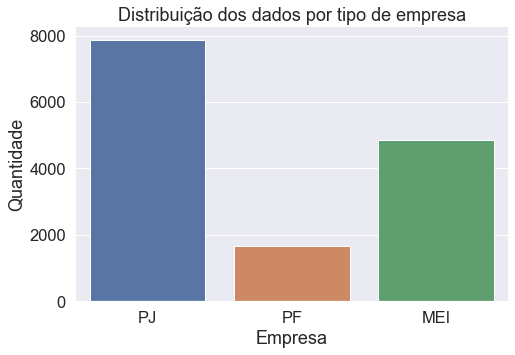

In [115]:
sns.set(font_scale = 1.5)
fig = sns.catplot (data = clientes, x ="tipo_empresa", kind = 'count', height = 5, aspect = 1.5);
fig.set(xlabel ="Empresa", ylabel = "Quantidade", title ='Distribuição dos dados por tipo de empresa');

A maior parte dos clientes são PJ ou MEI, sendo assim acredito que os PJ são considerados empresa maiores que MEI

**Quantidade de clientes por estado**

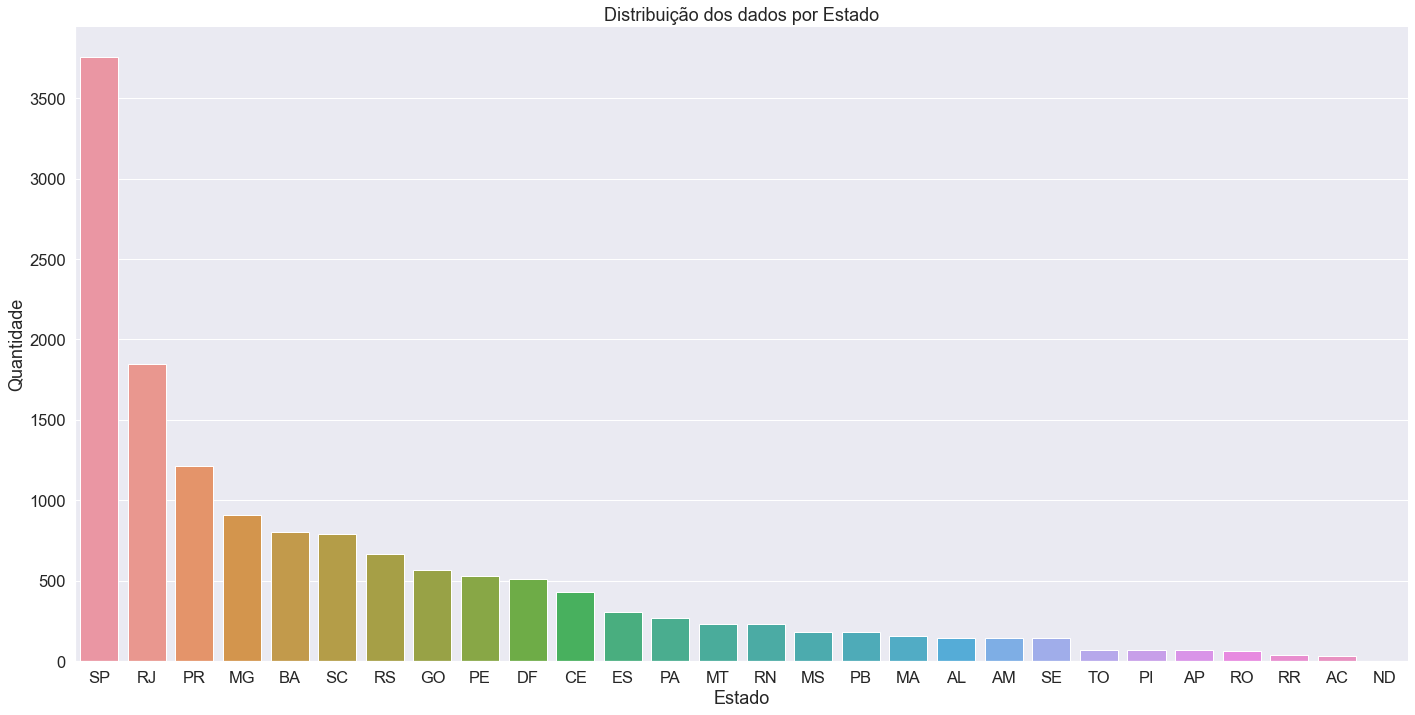

In [114]:
sns.set(font_scale = 1.5)
fig  = sns.catplot (data= clientes, x = "estado", kind = "count", height = 10, aspect = 2, order= clientes["estado"].value_counts().index);
fig.set(xlabel ="Estado", ylabel = "Quantidade", title ='Distribuição dos dados por Estado');

In [31]:
clientes.estado.value_counts()

SP    3756
RJ    1849
PR    1212
MG     911
BA     804
SC     792
RS     668
GO     568
PE     532
DF     510
CE     430
ES     307
PA     267
MT     233
RN     233
MS     184
PB     180
MA     159
AL     146
AM     144
SE     142
TO      72
PI      71
AP      69
RO      65
RR      38
AC      34
ND       3
Name: estado, dtype: int64

In [83]:
# verificando os estados ND
clientes [clientes ['estado'] =='ND']

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento
3152,c870225664a578f9b508e1aa016e84f6,PJ,N/D,ND,Lojas Diversas,Bens duráveis
9236,a52d0b7f3cd77dfc2251ced3086a7b8b,PJ,N/D,ND,Outros,Serviços
14390,2e2c407087012a5aebc896313434847e,PJ,N/D,ND,Outros,Serviços


Como são somente 3 regitros de  localidade não definida, esses dados serão dropados 

In [86]:
index = clientes[clientes['estado'] == 'ND'].index
clientes.drop(index, inplace=True )

Criação de uma nova coluna com as regiões do Brasil, com base nos estados 

In [89]:
# criando um dicionário dos estados e suas respctivas regiões 
mapa_regiao = { 'RO':   'Norte',
                'AC':	'Norte', 
                'AM':	'Norte', 
                'RR':	'Norte', 
                'PA':	'Norte',
                'AP':	'Norte',
                'TO':	'Norte',
                'MA':	'Nordeste',
                'PI':	'Nordeste',
                'CE':	'Nordeste',
                'RN':	'Nordeste',
                'PB':	'Nordeste',
                'PE':	'Nordeste',
                'AL':	'Nordeste',
                'SE':	'Nordeste',
                'BA':	'Nordeste',
                'MG':   'Sudeste',
                'ES':	'Sudeste',
                'RJ':	'Sudeste',
                'SP':	'Sudeste',    
                'PR':	'Sul',
                'SC':	'Sul',
                'RS':	'Sul',
                'MS':	'Centro-Oeste',
                'MT':	'Centro-Oeste',
                'GO':	'Centro-Oeste',
                'DF':	'Centro-Oeste',
                'ND':   'Não Definido'}

clientes['regiao'] = clientes['estado'].map(mapa_regiao)

In [90]:
clientes

,nr_documento,tipo_empresa,cidade,estado,subsegmento,segmento,regiao
0,094aaed740bbd7fcddb6c678c18d883a,PJ,Caucaia,CE,Alimentação Rápida,Alimentação,Nordeste
1,eaade7915611fcdcbba747e3a83365c6,PF,Cidade Ocidental,GO,Lojas Diversas,Varejo,Centro-Oeste
2,1f21958fd296f1b04a1f0c2658913856,MEI,Manaus,AM,Alimentação Rápida,Alimentação,Norte
3,fcdfe15db4520db1a1fe8b6a72878655,MEI,São Bernardo do Campo,SP,Alimentação Rápida,Alimentação,Sudeste
4,ba57e8837452b5e0114d7e273de039b4,PJ,Foz do Iguaçu,PR,Lojas Diversas,Supermercado/Farmácia,Sul
...,...,...,...,...,...,...,...
14400,bfed2a37a79957ea53cf1b70d467e4f1,PJ,Bage,RS,Outros,Serviços,Sul
14401,fbcba6437b248dfce69ac494b4c266f1,MEI,Osasco,SP,Automotivo,Bens duráveis,Sudeste
14402,29b16c64a0d582d0162c8346bcbab1b0,PJ,São Carlos,SP,Alimentação Rápida,Alimentação,Sudeste
14403,2ba5b641cad668157ede5a32fe1f3b00,MEI,Imbituba,SC,Educação,Serviços recorrentes,Sul


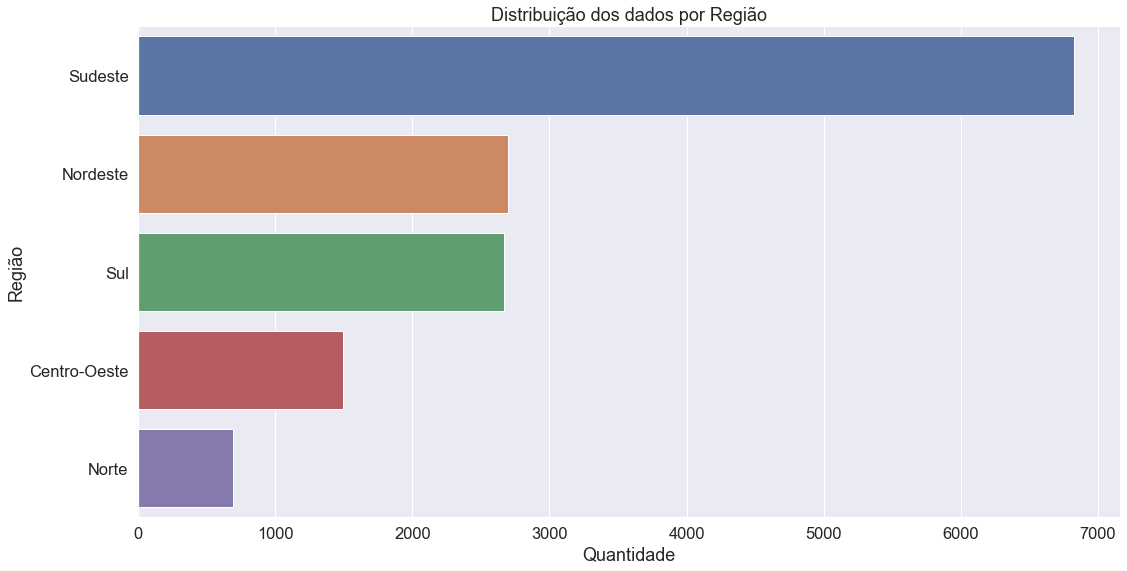

In [91]:
# visualização das regiões
sns.set(font_scale = 1.5)
fig = sns.catplot(data = clientes, y = "regiao", kind = "count", height = 8, aspect =2, order = clientes['regiao'].value_counts().index);
fig.set(xlabel ="Quantidade", ylabel = "Região", title ='Distribuição dos dados por Região');

**Quantidade de clientes por tipo de segmento e subsegmento**

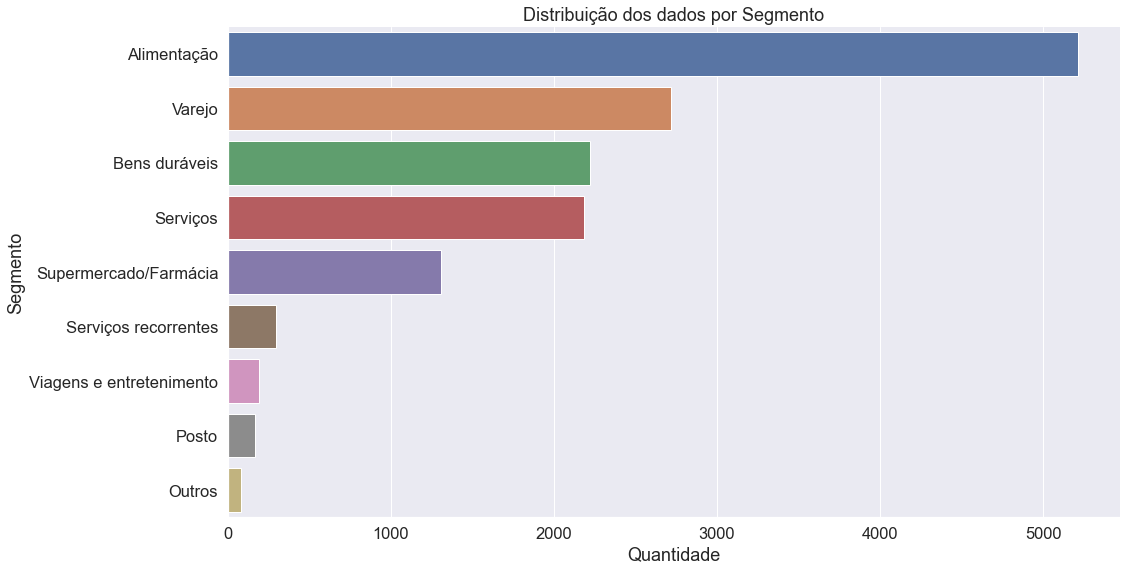

In [92]:
# segmento
sns.set(font_scale = 1.5)
fig = sns.catplot(data = clientes, y = "segmento", kind = "count", height = 8, aspect =2, order = clientes['segmento'].value_counts().index);
fig.set(xlabel ="Quantidade", ylabel = "Segmento", title ='Distribuição dos dados por Segmento');

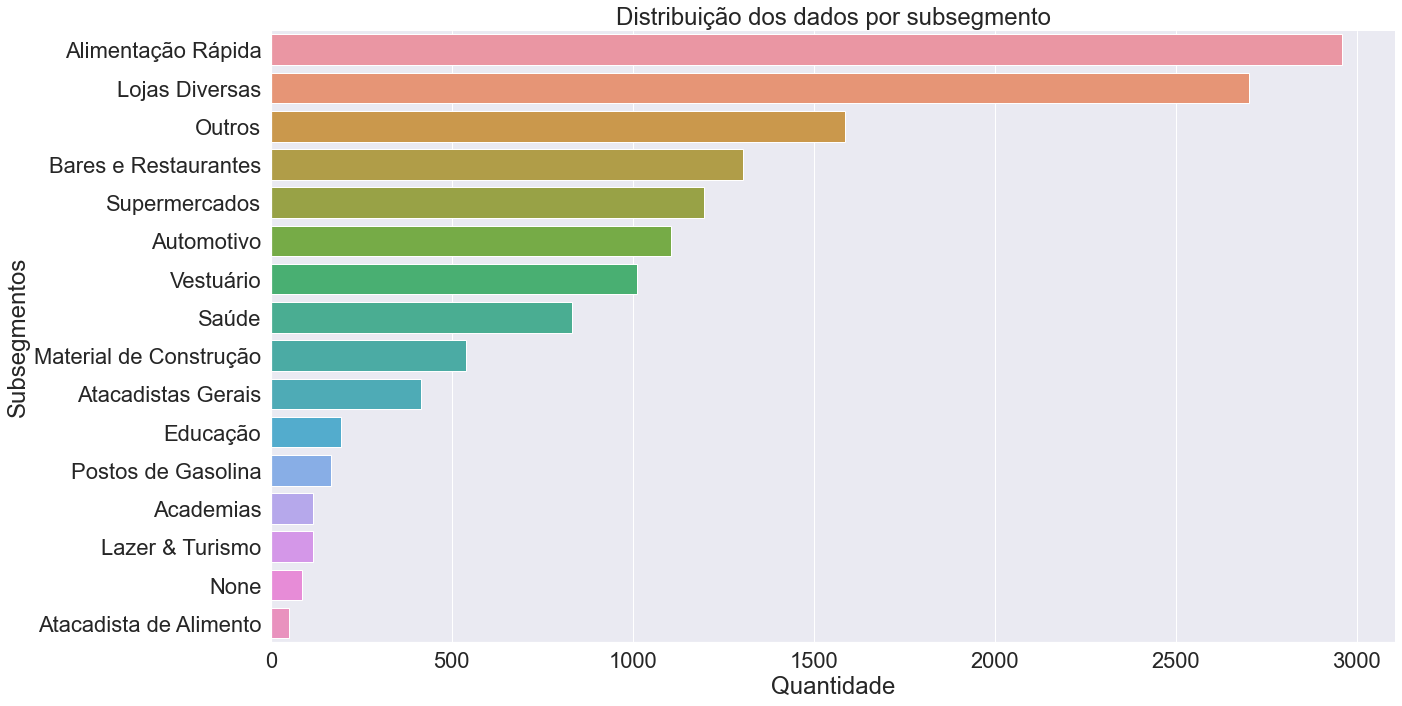

In [93]:
# subsegmento
sns.set(font_scale = 2)
fig = sns.catplot(data= clientes, y = 'subsegmento', kind = 'count',
                    height = 10, aspect =2, order = clientes.subsegmento.value_counts().index)

fig.set(xlabel ="Quantidade", ylabel = "Subsegmentos", title ='Distribuição dos dados por subsegmento');

O setor de alimentação é que possui mais clientes, sendo o subsegmento de alimentação rapida o de maior número 

**Cruzando os dados de região com segmento**

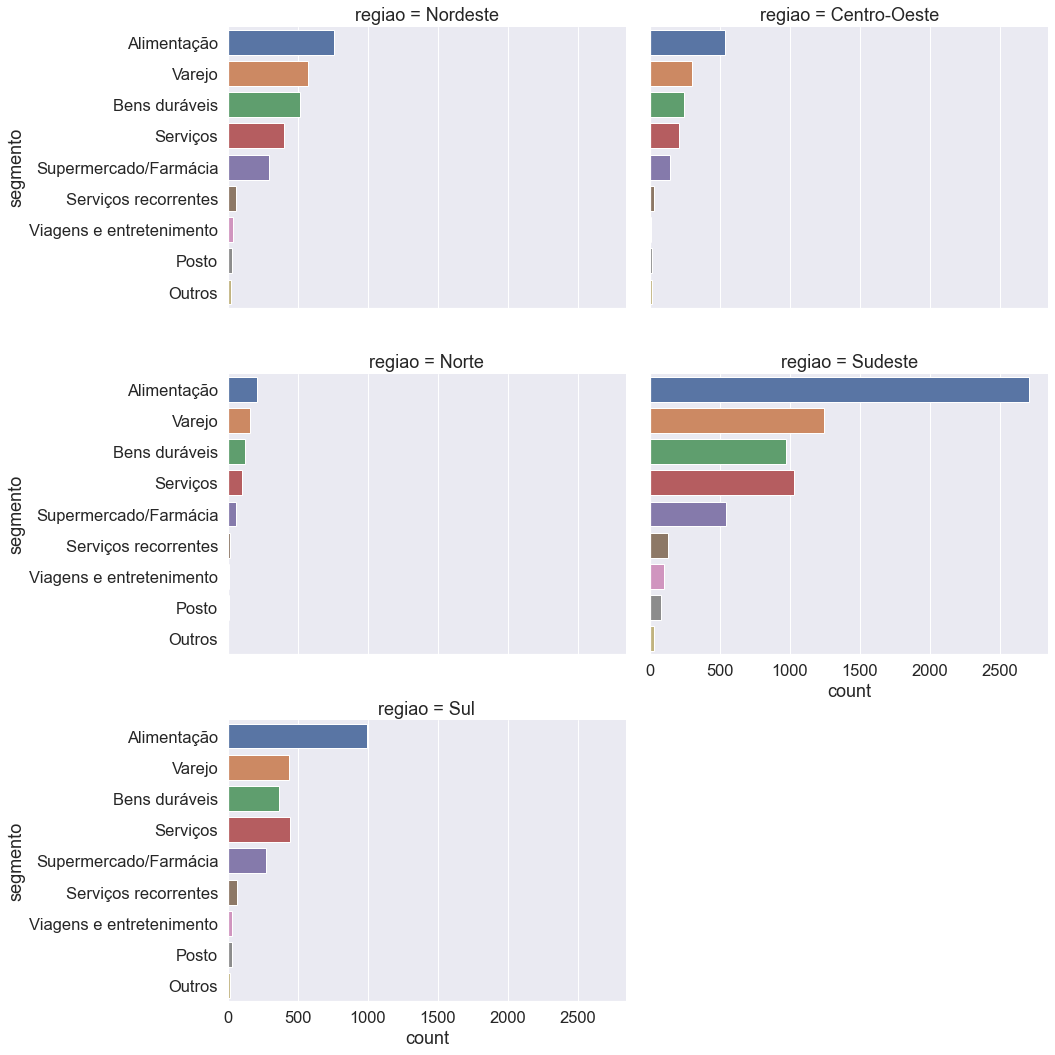

In [98]:
sns.set(font_scale = 1.5)
fig = sns.catplot(data = clientes, y = "segmento", kind = 'count', col = 'regiao', col_wrap=2, height = 5, aspect =1.5, order = clientes['segmento'].value_counts().index);


**Cruzando os dados de região com segmento**

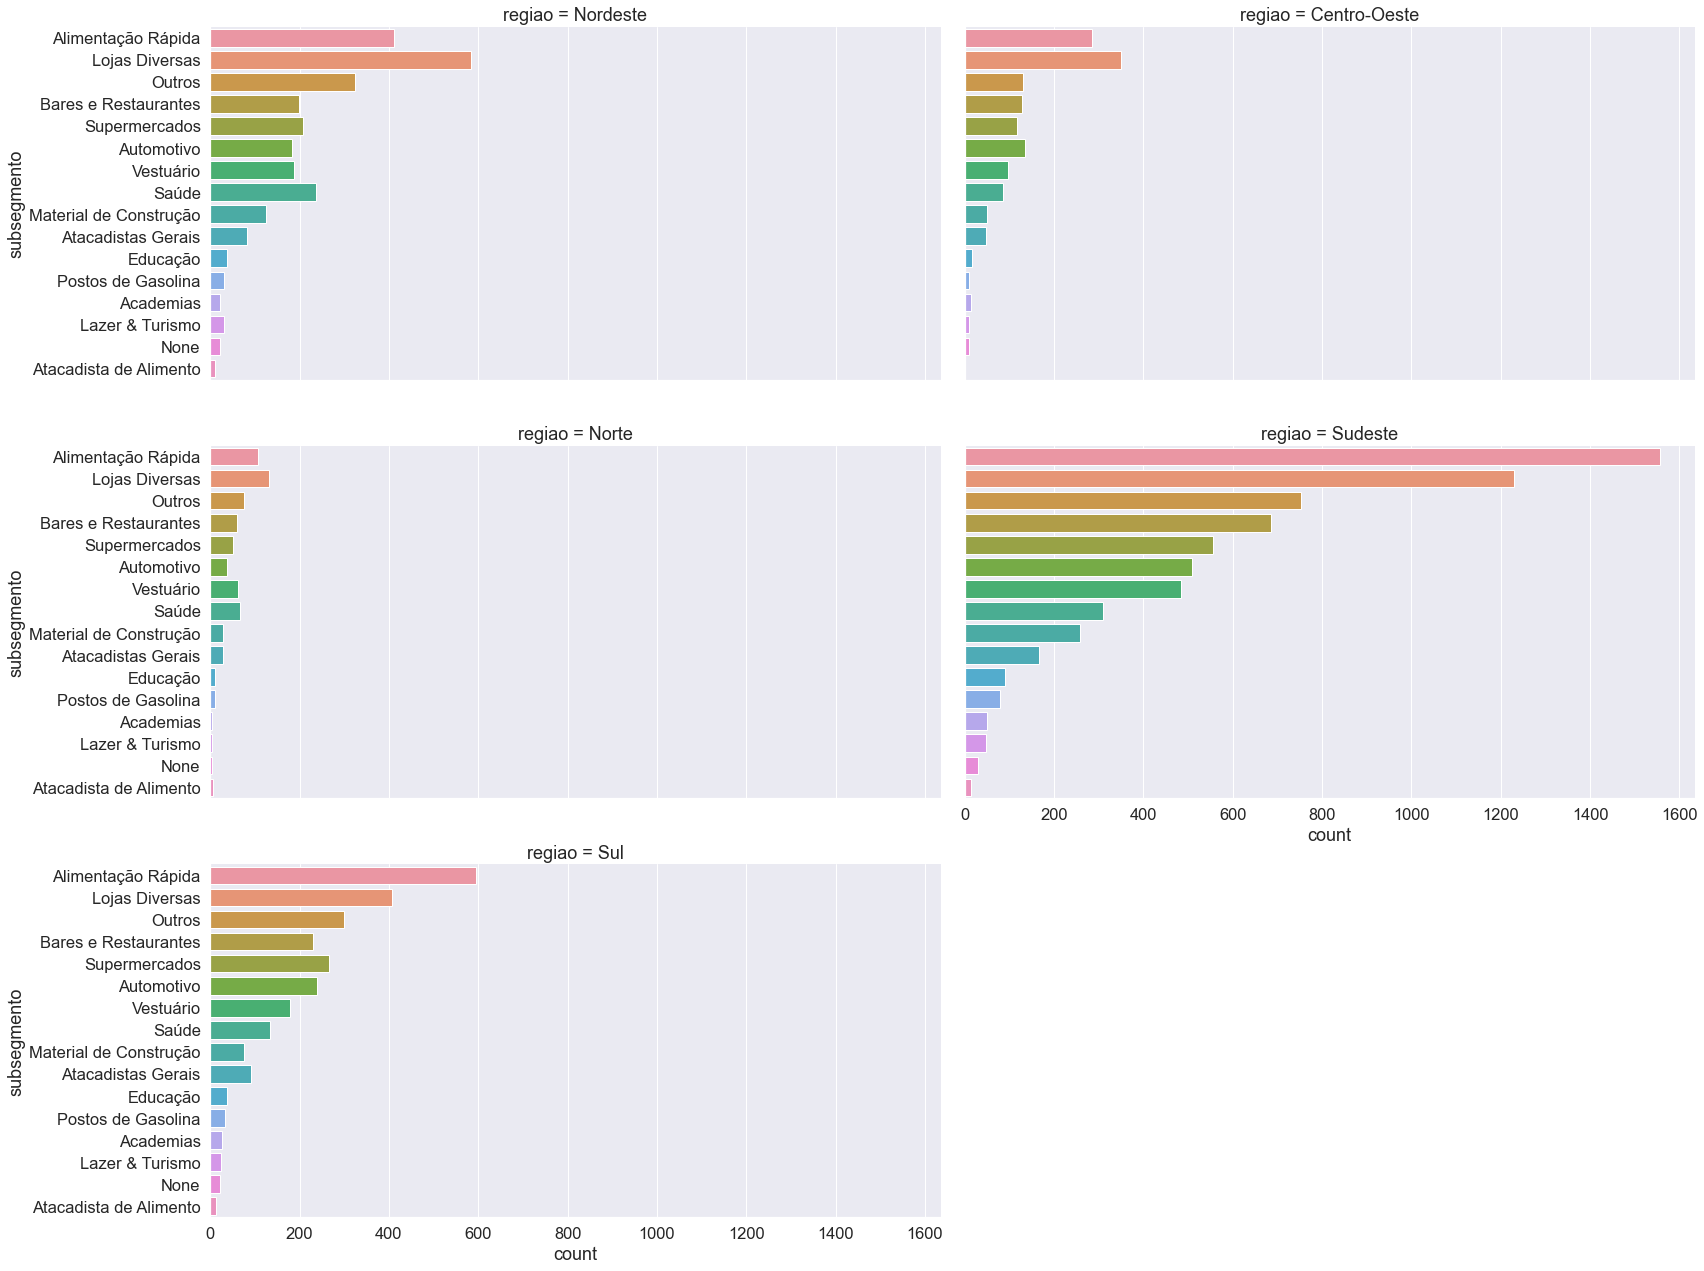

In [102]:
sns.set(font_scale = 1.5)
fig = sns.catplot(data = clientes, y = "subsegmento", kind = 'count', col = 'regiao', col_wrap=2, height = 6, aspect =2, order = clientes['subsegmento'].value_counts().index);

In [103]:
clientes.to_csv("clientes_limpo.csv", index = False)

-------------

## Conhecendo os dados de comunicação

In [2]:
comunicados = pd.read_csv('portfolio_comunicados.csv')
comunicados.head()

,contrato_id,dt_ref_portfolio,data_acao,tipo_acao,acao,status
0,0d823ddff1839eb938dccc68586ae365,2021-01-16,2021-01-18,HSM,campanhaobservacao,LIDO
1,c2f8a21671dbaeaa4157e03682c639e1,2021-05-22,2021-05-24,HSM,campanhaobservacao,ENTREGUE
2,e19a222c233d46ff4984489c13aa1b98,2020-09-15,2020-09-15,HSM,campanhaobservacao,NAO ENTREGUE
3,c24fc7630fe5b89928ba9478c2cdd9b2,2021-07-20,2021-07-20,HSM,campanhaobservacao,NAO ENTREGUE
4,0abe9c2f21e941f2bd3b086277e33ebc,2020-12-26,2020-12-28,HSM,campanhaobservacao,ENTREGUE


In [41]:
comunicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403740 entries, 0 to 403739
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   contrato_id       403740 non-null  object
 1   dt_ref_portfolio  403740 non-null  object
 2   data_acao         403740 non-null  object
 3   tipo_acao         403740 non-null  object
 4   acao              403740 non-null  object
 5   status            403740 non-null  object
dtypes: object(6)
memory usage: 18.5+ MB


In [42]:
comunicados.duplicated().sum()

0

In [105]:
# mudando o tipo de dado das datas 
comunicados['dt_ref_portfolio'] = pd.to_datetime(comunicados['dt_ref_portfolio'])
comunicados['data_acao'] = pd.to_datetime(comunicados['data_acao'])

In [44]:
comunicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403740 entries, 0 to 403739
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   contrato_id       403740 non-null  object        
 1   dt_ref_portfolio  403740 non-null  datetime64[ns]
 2   data_acao         403740 non-null  datetime64[ns]
 3   tipo_acao         403740 non-null  object        
 4   acao              403740 non-null  object        
 5   status            403740 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 18.5+ MB


In [22]:
comunicados.describe()

,contrato_id,dt_ref_portfolio,data_acao,tipo_acao,acao,status
count,403740,403740,403740,403740,403740,403740
unique,12202,830,594,2,5,4
top,d9e21ac12696c51e4f68cbd1dd19560e,2021-04-03,2021-04-05,HSM,campanhaobservacao,NAO ENTREGUE
freq,186,2076,3026,201870,213334,191207


Pelos valores unicos, nota-se que **12202 contratos de emprestimo necessitaram de algum tipo de cobrança**

**Tipos de ação**

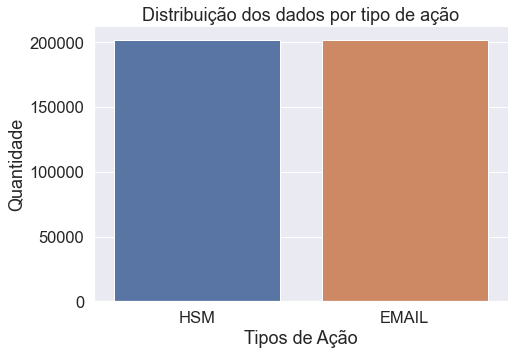

In [20]:
sns.set(font_scale = 1.5)
fig = sns.catplot (data = comunicados, x ="tipo_acao", kind = 'count', height = 5, aspect = 1.5);
fig.set(xlabel ="Tipos de Ação", ylabel = "Quantidade", title ='Distribuição dos dados por tipo de ação');

As duas ações de comunicação realizadas são sempre envidas conjuntamente, pois os valores são iguais 

**Ações realizadas**

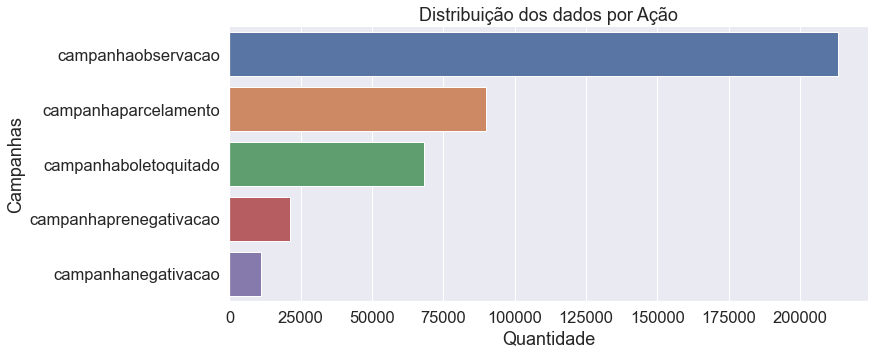

In [59]:
sns.set(font_scale = 1.5)
fig = sns.catplot (data = comunicados, y ="acao", kind = 'count', height = 5, aspect = 2.5, order =  comunicados.acao.value_counts().index);
fig.set(xlabel ="Quantidade", ylabel = "Campanhas", title ='Distribuição dos dados por Ação');

São realizadas 5 campanhas:
- observação
- parcelamento
- boleto quitado
- pré-negativação
- negativação

Dentre essas a mais realizada é a campanha de observação e a menos realizada é a de negativação.

Ao comprar as campanhas realizadas com a tabela fornecedida na descrição do case, nota-se que a campanha de boleto quitado ocorre em duas periodos das ações de cobrança.

Além disso, verifica-se que a ordem de ocorrencia dos eventos são as mesmas que as das quantidades de cada campanha. Com isso,  levanta-se a hipotese de que as acampanhas iniciais são efetivas e poucas são as vezes que é necessário realizar as campanhhas de negativação 

![image](https://user-images.githubusercontent.com/71708626/166146835-997939a0-d906-4ff4-9605-501835bf1e05.png)

**Status**

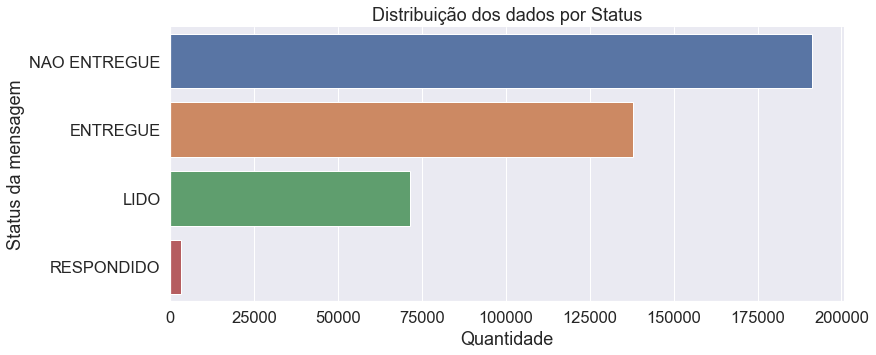

In [61]:
sns.set(font_scale = 1.5)
fig = sns.catplot (data = comunicados, y ="status", kind = 'count', height = 5, aspect = 2.5, order =  comunicados.status.value_counts().index);
fig.set(xlabel ="Quantidade", ylabel = "Status da mensagem", title ='Distribuição dos dados por Status');

Nota-se que a maior parte das mensagens enviadas não são entregue.
Que das mensagem entregues muitas não são lidas 
E um parcela muito pequena é respondida.

In [62]:
comunicados.to_csv("comunicados_limpo.csv", index = False)

**Cruzando as infomações**

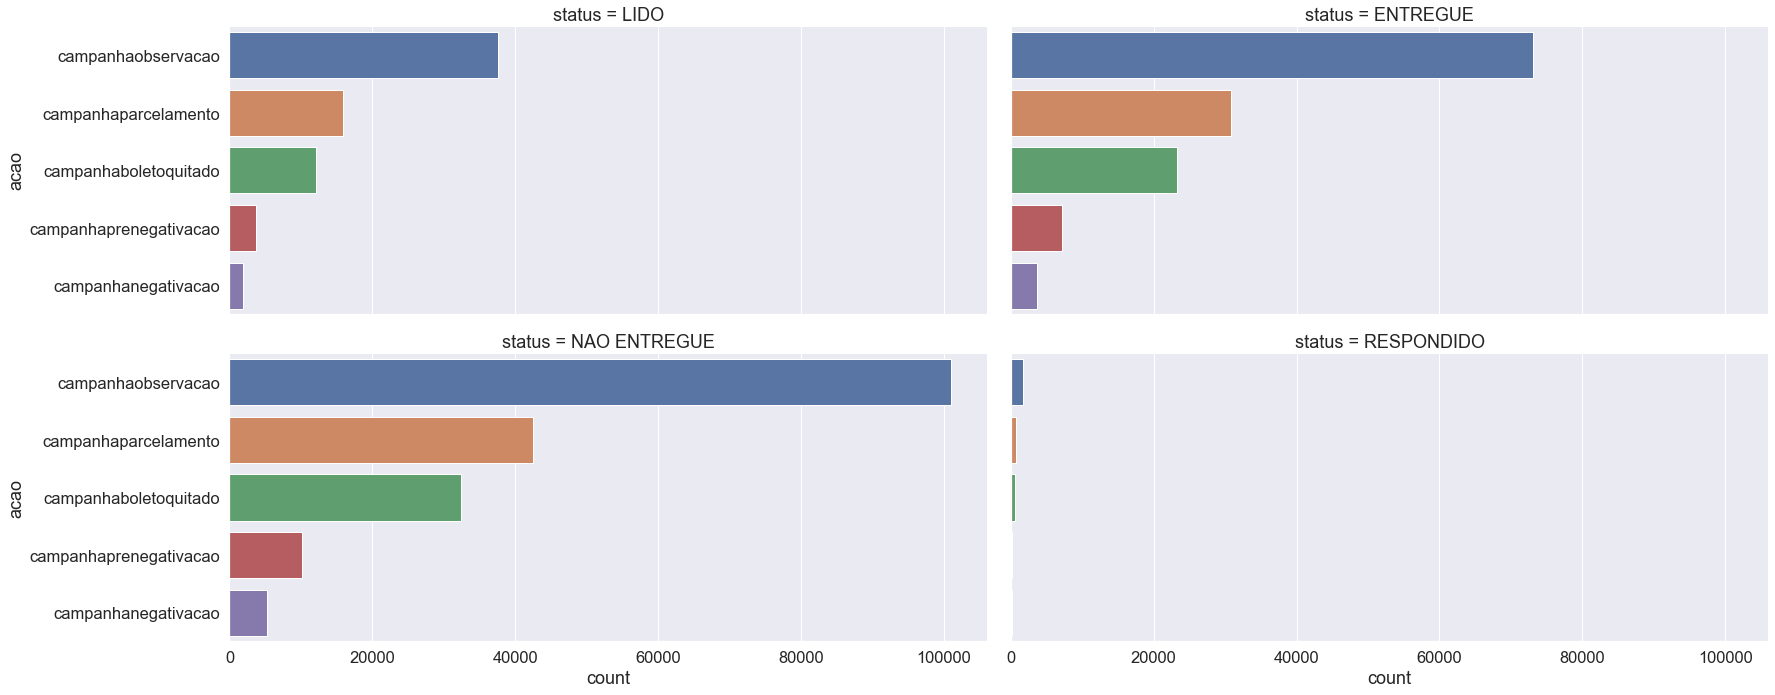

In [106]:
# acção e status

sns.set(font_scale = 1.5)
fig = sns.catplot (data = comunicados, y ="acao", kind = 'count', col = 'status', col_wrap=2, height = 5, aspect = 2.5, order =  comunicados.acao.value_counts().index);


Verifica-se que a maior partes das mensagens não são entregues, independente do tipo de camapnha realizada. 
Somente análisando essa base não se tem um visualização do porque isso ocorre, pode ser em razão :
- do tipo de mensagem enviada: HSM ou email
- a campnaha de observação ser considerada um spam  quando enviada por email 
- o cliente ter mudados os dados cadastrais

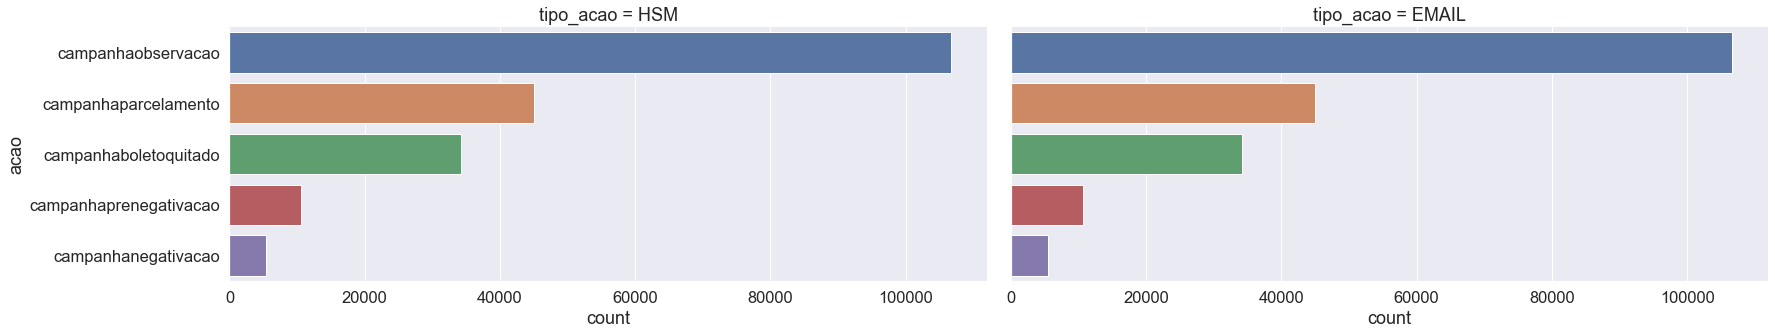

In [107]:
# mensagens  e ação
sns.set(font_scale = 1.5)
fig = sns.catplot (data = comunicados, y ="acao", kind = 'count', col = 'tipo_acao', col_wrap=2, height = 5, aspect = 2.5, order =  comunicados.acao.value_counts().index);


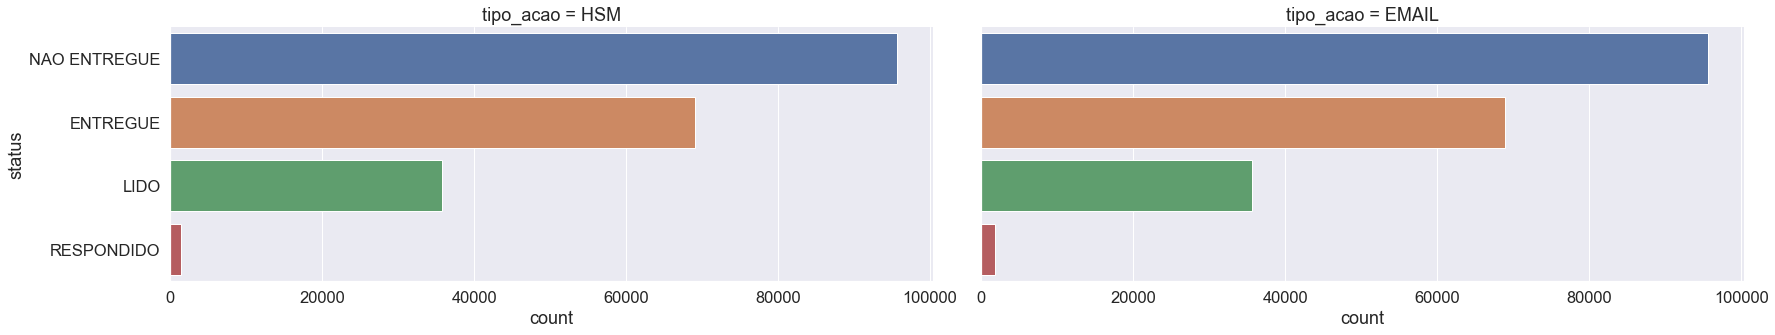

In [110]:
# status e mensagem

sns.set(font_scale = 1.5)
fig = sns.catplot (data = comunicados, y ="status", kind = 'count', col = 'tipo_acao', col_wrap=2, height = 5, aspect = 2.5, order =  comunicados.status.value_counts().index);


Nota-se que, com relação a forma de comunicação, ambas são realizadas em todas as camapanhas e além disso, os status da mensagem seguem o mesmo padrão independente da modalidade de comunicação.

In [111]:
comunicados.to_csv("comunicados_limpo.csv", index = False)

------------